Verificar como fazer download do dataset do github e exluir arquivos que não são importantes, por fim, será necessário salvar os arquivos em um repo tipo o huggingface

In [135]:
import os
import glob
import pandas as pd
import numpy as np

In [136]:
path = os.path.join(os.pardir, "datasets", "5G-production-dataset")


In [137]:
files = glob.glob(path + "/**/*.csv", recursive=True)

In [138]:
listdf = []
for i, file in enumerate(files):
  file = file.replace("\\","/")
  df = pd.read_csv(file)
  folders_name = file.split('/')[3:-1]

  # It will identify if the user is static or moving.
  df["Mobility_Pattern"] = folders_name[1]
  folders_name.pop(1)

  # It will identify if the user is downloading or watching some streaming.
  df["User_Activity"] = ' '.join(folders_name)

  # It will identify if the user is downloading or watching some streaming.
  df["Log_Number"] = i

  listdf.append(df)

del df

In [139]:
df = pd.concat(listdf, axis=0, ignore_index=True)

In [140]:
df

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ,Mobility_Pattern,User_Activity,Log_Number
0,2019.11.28_07.27.57,-8.388193,51.935608,0,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
1,2019.11.28_07.27.57,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
2,2019.11.28_07.27.58,-8.388269,51.935542,1,B,12,5G,-102,-10,8.0,...,-,C,A81B,9CBA,11016972,-102.0,-1.0,Driving,Amazon_Prime animated-AdventureTime,0
3,2019.11.28_07.27.59,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
4,2019.11.28_07.28.00,-8.388269,51.935542,1,B,12,5G,-102,-10,3.0,...,-,C,A81B,9CBA,11016972,-101.0,-3.0,Driving,Amazon_Prime animated-AdventureTime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188706,2019.12.16_13.36.25,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188707,2019.12.16_13.36.27,-8.394601,51.886139,0,B,11,5G,-101,-13,-7.0,...,-,B,A4DF,9CBA,10805003,-103.0,-20.0,Static,Netflix Season3-StrangerThings,82
188708,2019.12.16_13.36.28,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82
188709,2019.12.16_13.36.29,-8.394601,51.886139,0,B,11,5G,-103,-12,5.0,...,-,B,A4DF,9CBA,10805003,-105.0,-19.0,Static,Netflix Season3-StrangerThings,82


In [141]:
# Remove unused columns
cleaned = df.drop(['Latitude','Longitude','Operatorname','CellID','PINGAVG','PINGMIN','PINGMAX','PINGSTDEV','PINGLOSS','CELLHEX','NODEHEX','LACHEX','RAWCELLID','NRxRSRP','NRxRSRQ'],axis=1)

In [142]:
# Convert unkown string to datetime64
# add TZ +1000 for Dublin, Ireland UTC
cleaned["Timestamp"] = cleaned["Timestamp"].apply(lambda row : row[:9].replace(".", "-") + row[9:].replace(".", ":").replace("_", " ") ).astype("datetime64[ns]")

In [143]:
cleaned.count()

Timestamp           188711
Speed               188711
NetworkMode         188711
RSRP                188711
RSRQ                188711
SNR                 188711
CQI                 188711
RSSI                188711
DL_bitrate          188711
UL_bitrate          188711
State               188711
Mobility_Pattern    188711
User_Activity       188711
Log_Number          188711
dtype: int64

In [144]:
# Remove values when state is idle and when bitrate falls below threshold
cleaned = cleaned[(cleaned.State != 'I') & (cleaned.DL_bitrate > 10)]


In [145]:
cleaned.count()

Timestamp           91178
Speed               91178
NetworkMode         91178
RSRP                91178
RSRQ                91178
SNR                 91178
CQI                 91178
RSSI                91178
DL_bitrate          91178
UL_bitrate          91178
State               91178
Mobility_Pattern    91178
User_Activity       91178
Log_Number          91178
dtype: int64

In [146]:
cleaned.dtypes

Timestamp           datetime64[ns]
Speed                        int64
NetworkMode                 object
RSRP                         int64
RSRQ                        object
SNR                         object
CQI                         object
RSSI                        object
DL_bitrate                   int64
UL_bitrate                   int64
State                       object
Mobility_Pattern            object
User_Activity               object
Log_Number                   int64
dtype: object

In [147]:
# Rename '-' to NaN values
cleaned[["RSRQ","SNR","CQI", "RSSI"]] = cleaned[["RSRQ","SNR","CQI", "RSSI"]].replace('-', np.nan)


In [150]:
# Change objects columns to int64 dtype
cleaned[["RSRQ","SNR","CQI", "RSSI"]].astype(float).astype('Int64')

,RSRQ,SNR,CQI,RSSI
5,-11,6,14,<NA>
6,-11,6,14,<NA>
8,-11,1,14,<NA>
9,-9,8,14,<NA>
10,-9,8,14,<NA>
...,...,...,...,...
188625,-12,-5,15,-88
188626,-11,-3,15,-88
188666,-16,-4,14,-87
188682,-11,3,14,-87


In [151]:
# Show sum of nan values in all columns
cleaned.isna().sum()

Timestamp               0
Speed                   0
NetworkMode             0
RSRP                    0
RSRQ                 3198
SNR                 12329
CQI                 12330
RSSI                30878
DL_bitrate              0
UL_bitrate              0
State                   0
Mobility_Pattern        0
User_Activity           0
Log_Number              0
dtype: int64

In [152]:
cleaned[cleaned['RSRQ'].isna()].Log_Number.unique()

array([ 5, 11, 22, 23, 38, 39, 40, 42, 43, 44, 46, 71], dtype=int64)

In [153]:
cleaned[cleaned['SNR'].isna()].Log_Number.unique()

array([ 0,  2,  3,  5,  6, 10, 11, 14, 16, 17, 18, 19, 20, 22, 23, 25, 29,
       31, 32, 38, 39, 40, 42, 43, 44, 50, 51, 53, 55, 56, 59, 64, 65, 70,
       71, 72, 73, 79], dtype=int64)

In [154]:
cleaned[cleaned['CQI'].isna()].Log_Number.unique()

array([ 0,  2,  3,  5,  6, 10, 11, 14, 16, 17, 18, 19, 20, 22, 23, 25, 29,
       31, 32, 38, 39, 40, 42, 43, 44, 50, 51, 53, 55, 56, 59, 64, 65, 70,
       71, 72, 73, 79], dtype=int64)

In [155]:
cleaned[cleaned['RSSI'].isna()].Log_Number.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 38, 39, 40, 42, 43, 44, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
       77, 78, 79, 80, 81, 82], dtype=int64)

# Handling Missing Data

<Axes: >

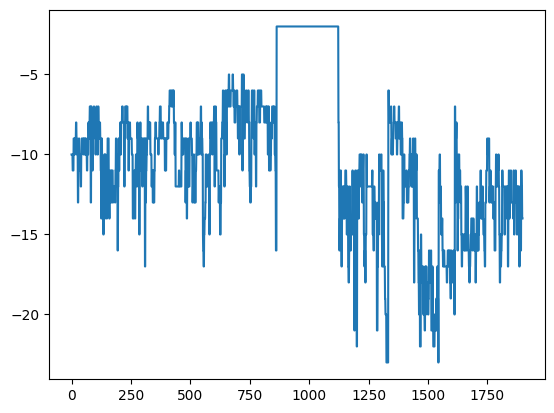

In [157]:
df[(df.Log_Number == 0)].RSRQ.plot()